## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  87.517481  1670.617427  0.876191  7.788566  1466.522120
1  80.478018  1052.085786  0.075619  9.696768   113.144102
2  78.769634   212.217075  0.564122  2.549550   143.318473
3  28.081843  1231.720959  0.324030  6.120662   400.136847
4  21.344309  1552.708599  0.832900  9.561776  1293.306606


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0034268	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9915214	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9813307	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9712163	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9560510	total: 60.1ms	remaining: 12s
5:	learn: 0.9437938	total: 60.6ms	remaining: 10s
6:	learn: 0.9316375	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9169590	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9064468	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8939125	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8815711	total: 63ms	remaining: 5.66s
11:	learn: 0.8687794	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8556362	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8436764	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8317172	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8218360	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8093046	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8008400	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7921898	total: 66.7ms	remaining: 3.44s

111:	learn: 0.2564264	total: 107ms	remaining: 845ms
112:	learn: 0.2536000	total: 107ms	remaining: 840ms
113:	learn: 0.2513023	total: 108ms	remaining: 836ms
114:	learn: 0.2482381	total: 108ms	remaining: 831ms
115:	learn: 0.2462995	total: 109ms	remaining: 827ms
116:	learn: 0.2433777	total: 109ms	remaining: 822ms
117:	learn: 0.2408699	total: 109ms	remaining: 818ms
118:	learn: 0.2386665	total: 110ms	remaining: 813ms
119:	learn: 0.2365347	total: 110ms	remaining: 808ms
120:	learn: 0.2337020	total: 111ms	remaining: 805ms
121:	learn: 0.2319333	total: 111ms	remaining: 801ms
122:	learn: 0.2296276	total: 112ms	remaining: 797ms
123:	learn: 0.2274700	total: 112ms	remaining: 793ms
124:	learn: 0.2244038	total: 113ms	remaining: 790ms
125:	learn: 0.2218330	total: 113ms	remaining: 786ms
126:	learn: 0.2192313	total: 114ms	remaining: 782ms
127:	learn: 0.2165717	total: 114ms	remaining: 778ms
128:	learn: 0.2145203	total: 115ms	remaining: 775ms
129:	learn: 0.2127921	total: 115ms	remaining: 772ms
130:	learn: 

286:	learn: 0.0495021	total: 186ms	remaining: 461ms
287:	learn: 0.0491698	total: 186ms	remaining: 460ms
288:	learn: 0.0488686	total: 186ms	remaining: 459ms
289:	learn: 0.0485112	total: 187ms	remaining: 457ms
290:	learn: 0.0482090	total: 187ms	remaining: 456ms
291:	learn: 0.0479251	total: 188ms	remaining: 455ms
292:	learn: 0.0475257	total: 188ms	remaining: 454ms
293:	learn: 0.0472601	total: 188ms	remaining: 453ms
294:	learn: 0.0469548	total: 189ms	remaining: 451ms
295:	learn: 0.0466288	total: 189ms	remaining: 450ms
296:	learn: 0.0462677	total: 190ms	remaining: 449ms
297:	learn: 0.0459814	total: 190ms	remaining: 448ms
298:	learn: 0.0457163	total: 190ms	remaining: 446ms
299:	learn: 0.0453935	total: 191ms	remaining: 445ms
300:	learn: 0.0451266	total: 191ms	remaining: 444ms
301:	learn: 0.0448854	total: 192ms	remaining: 443ms
302:	learn: 0.0445372	total: 192ms	remaining: 442ms
303:	learn: 0.0442772	total: 193ms	remaining: 441ms
304:	learn: 0.0440422	total: 193ms	remaining: 440ms
305:	learn: 

534:	learn: 0.0171612	total: 288ms	remaining: 250ms
535:	learn: 0.0171159	total: 288ms	remaining: 250ms
536:	learn: 0.0170550	total: 289ms	remaining: 249ms
537:	learn: 0.0169933	total: 289ms	remaining: 248ms
538:	learn: 0.0169526	total: 290ms	remaining: 248ms
539:	learn: 0.0168927	total: 290ms	remaining: 247ms
540:	learn: 0.0168341	total: 291ms	remaining: 247ms
541:	learn: 0.0167863	total: 291ms	remaining: 246ms
542:	learn: 0.0167440	total: 292ms	remaining: 245ms
543:	learn: 0.0166867	total: 292ms	remaining: 245ms
544:	learn: 0.0166306	total: 292ms	remaining: 244ms
545:	learn: 0.0165840	total: 293ms	remaining: 243ms
546:	learn: 0.0165293	total: 293ms	remaining: 243ms
547:	learn: 0.0164757	total: 293ms	remaining: 242ms
548:	learn: 0.0164302	total: 294ms	remaining: 241ms
549:	learn: 0.0163511	total: 294ms	remaining: 241ms
550:	learn: 0.0162985	total: 295ms	remaining: 240ms
551:	learn: 0.0162472	total: 295ms	remaining: 240ms
552:	learn: 0.0162028	total: 296ms	remaining: 239ms
553:	learn: 

708:	learn: 0.0095614	total: 367ms	remaining: 151ms
709:	learn: 0.0095289	total: 367ms	remaining: 150ms
710:	learn: 0.0094811	total: 368ms	remaining: 150ms
711:	learn: 0.0094574	total: 368ms	remaining: 149ms
712:	learn: 0.0094342	total: 369ms	remaining: 148ms
713:	learn: 0.0094113	total: 369ms	remaining: 148ms
714:	learn: 0.0093836	total: 369ms	remaining: 147ms
715:	learn: 0.0093609	total: 370ms	remaining: 147ms
716:	learn: 0.0093243	total: 370ms	remaining: 146ms
717:	learn: 0.0093174	total: 371ms	remaining: 146ms
718:	learn: 0.0093105	total: 371ms	remaining: 145ms
719:	learn: 0.0092773	total: 372ms	remaining: 145ms
720:	learn: 0.0092693	total: 372ms	remaining: 144ms
721:	learn: 0.0092374	total: 373ms	remaining: 143ms
722:	learn: 0.0092050	total: 373ms	remaining: 143ms
723:	learn: 0.0091655	total: 374ms	remaining: 143ms
724:	learn: 0.0091339	total: 375ms	remaining: 142ms
725:	learn: 0.0091109	total: 375ms	remaining: 142ms
726:	learn: 0.0090802	total: 375ms	remaining: 141ms
727:	learn: 

947:	learn: 0.0045904	total: 470ms	remaining: 25.8ms
948:	learn: 0.0045833	total: 470ms	remaining: 25.3ms
949:	learn: 0.0045738	total: 471ms	remaining: 24.8ms
950:	learn: 0.0045644	total: 471ms	remaining: 24.3ms
951:	learn: 0.0045405	total: 472ms	remaining: 23.8ms
952:	learn: 0.0045319	total: 472ms	remaining: 23.3ms
953:	learn: 0.0045157	total: 472ms	remaining: 22.8ms
954:	learn: 0.0045038	total: 473ms	remaining: 22.3ms
955:	learn: 0.0044948	total: 473ms	remaining: 21.8ms
956:	learn: 0.0044860	total: 474ms	remaining: 21.3ms
957:	learn: 0.0044818	total: 474ms	remaining: 20.8ms
958:	learn: 0.0044701	total: 474ms	remaining: 20.3ms
959:	learn: 0.0044615	total: 475ms	remaining: 19.8ms
960:	learn: 0.0044573	total: 475ms	remaining: 19.3ms
961:	learn: 0.0044532	total: 475ms	remaining: 18.8ms
962:	learn: 0.0044476	total: 476ms	remaining: 18.3ms
963:	learn: 0.0044349	total: 476ms	remaining: 17.8ms
964:	learn: 0.0044295	total: 476ms	remaining: 17.3ms
965:	learn: 0.0044064	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

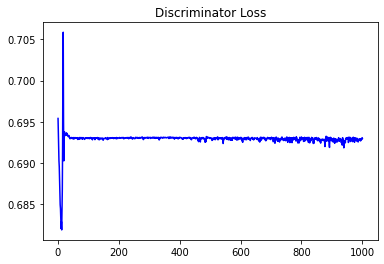

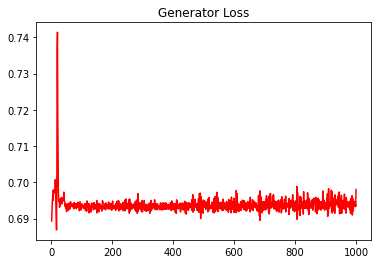

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008594277234971354


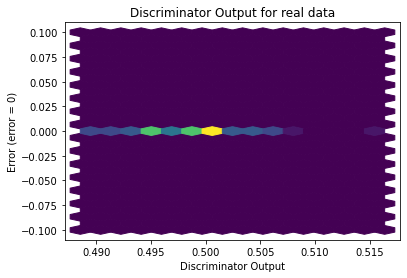

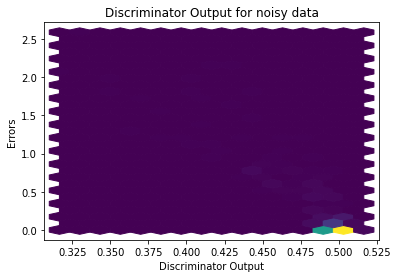

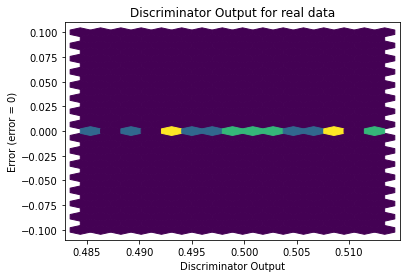

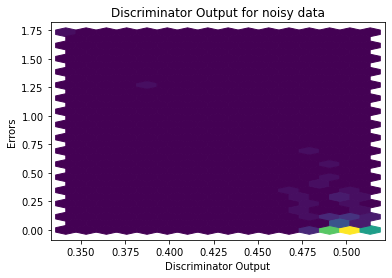

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


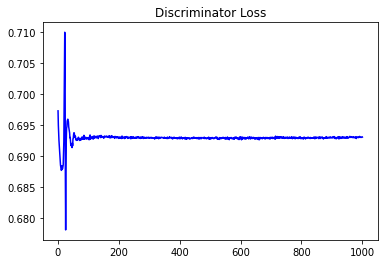

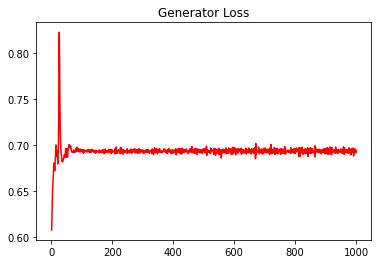

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010891025924495285


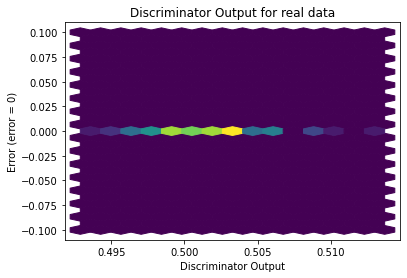

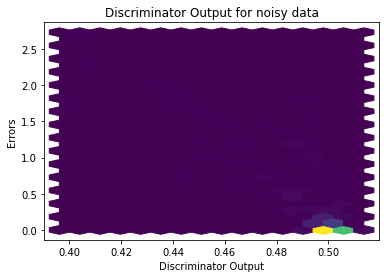

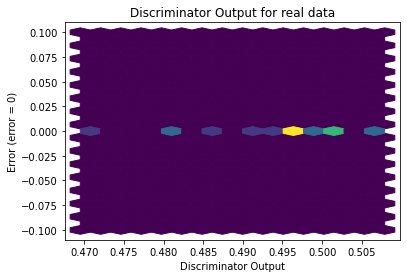

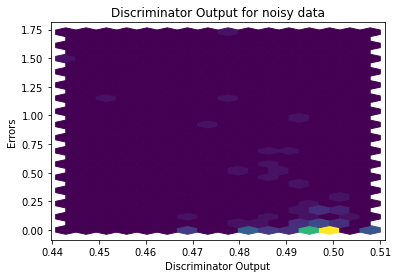

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3892]], requires_grad=True)
